<a href="https://colab.research.google.com/github/Paritoshyadav/breast-cancer-classifier/blob/master/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get update
!apt-get upgrade

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [801 B]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 https://cloud.r-project.org/bin/linux/ub

In [0]:
import seaborn as sns

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
cancer=load_breast_cancer()

In [0]:
cancer['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [0]:
cancer_data=pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [0]:
cancer_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


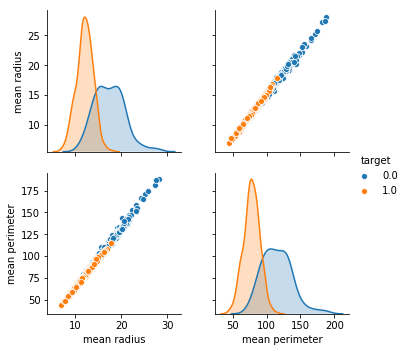

In [0]:
sns.pairplot(cancer_data,hue='target',vars=['mean radius','mean perimeter'])

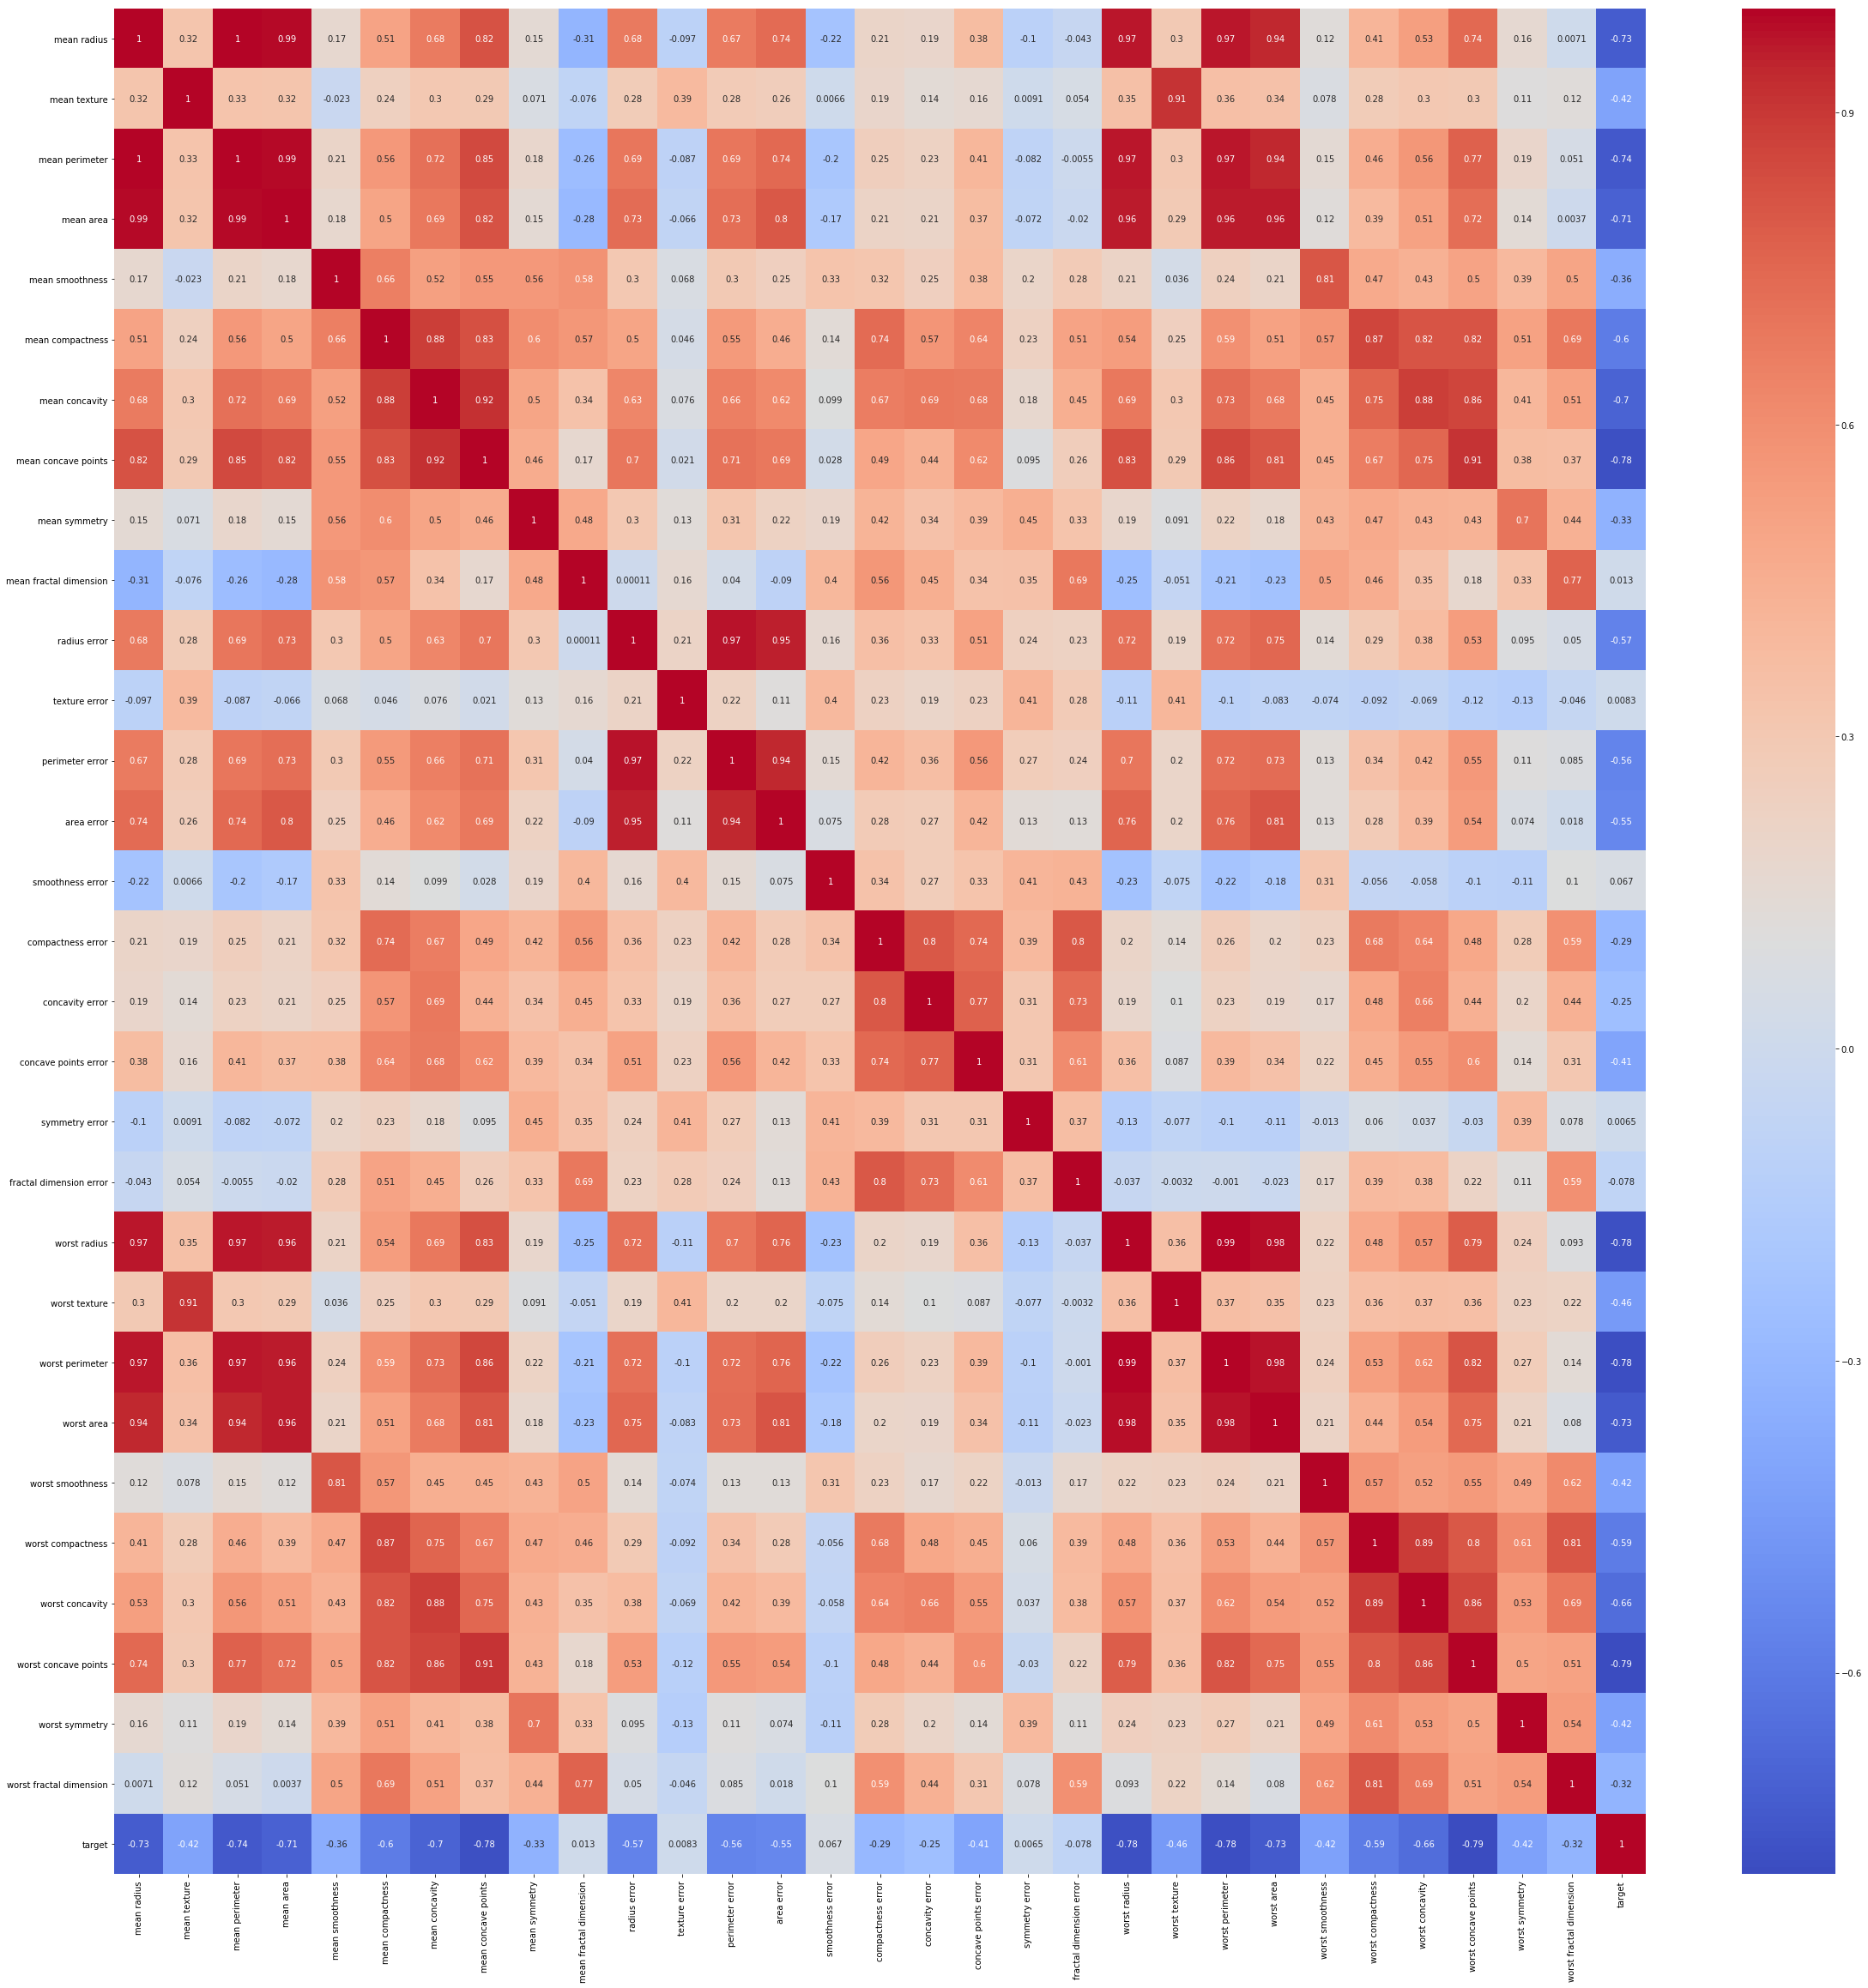

In [0]:
plt.figure(figsize =(40,40))
sns.heatmap(cancer_data.corr(),annot=True,cmap='coolwarm')

In [0]:
x=cancer_data.drop(['target'],axis=1)

In [0]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
y=cancer_data['target']

In [0]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [0]:
x_test

In [0]:
from sklearn.svm import SVC

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
model=SVC()

In [0]:
min_train =x_train.min()
range_train=(x_train-min_train).max()
x_train_scale=(x_train-min_train)/range_train

In [0]:
min_test =x_test.min()
range_test=(x_test-min_test).max()
x_test_scale=(x_test-min_test)/range_test

In [0]:
x_test_scale

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
260,0.682279,0.804243,0.655201,0.595019,0.452399,0.327758,0.451010,0.487872,0.502467,0.120220,0.254248,0.198135,0.217175,0.225920,0.077937,0.147108,0.147218,0.208429,0.116854,0.072509,0.631306,0.757282,0.608050,0.499496,0.570198,0.403693,0.419305,0.615747,0.478143,0.306662
170,0.213905,0.096914,0.203957,0.132881,0.493727,0.172481,0.118379,0.193413,0.621711,0.204396,0.106523,0.085432,0.097573,0.042539,0.184045,0.098455,0.117038,0.316017,0.268778,0.103460,0.177560,0.043689,0.167369,0.091370,0.448539,0.133900,0.137481,0.340747,0.380464,0.155728
198,0.616038,0.583896,0.610119,0.516491,0.234391,0.463162,0.330760,0.353999,0.463816,0.110769,0.288964,0.210405,0.379687,0.235796,0.094938,0.406264,0.188178,0.310924,0.148327,0.203356,0.590665,0.541869,0.632035,0.450328,0.392594,0.830476,0.427828,0.619739,0.490805,0.456858
378,0.292456,0.229990,0.282601,0.198228,0.196753,0.195062,0.126158,0.129169,0.484375,0.191648,0.019002,0.047425,0.023360,0.010601,0.083911,0.318982,0.169889,0.212783,0.243694,0.331247,0.221133,0.165049,0.231660,0.125378,0.350857,0.429242,0.284370,0.382438,0.549292,0.508112
397,0.242042,0.341369,0.239022,0.157673,0.163690,0.248706,0.219418,0.213434,0.305099,0.159341,0.223369,0.269303,0.227739,0.111563,0.091298,0.379248,0.316064,0.352432,0.255762,0.261607,0.187615,0.208131,0.189306,0.104576,0.065270,0.221635,0.210427,0.301016,0.127525,0.190388
284,0.247318,0.256509,0.247621,0.162329,0.130332,0.275986,0.331057,0.177209,0.188322,0.200000,0.157044,0.307341,0.185872,0.073321,0.126538,0.438414,0.551252,0.451744,0.257892,0.229351,0.194319,0.166566,0.197496,0.106026,0.100080,0.302781,0.370157,0.369013,0.130841,0.199484
546,0.096665,0.287850,0.090917,0.054801,0.368856,0.093349,0.030048,0.028725,0.560855,0.258462,0.083135,0.177889,0.056619,0.019110,0.150148,0.042797,0.070376,0.139929,0.182640,0.134585,0.083291,0.229672,0.074646,0.039618,0.359737,0.072550,0.048528,0.086393,0.336449,0.232915
96,0.205698,0.359691,0.195108,0.125589,0.518819,0.175508,0.073931,0.153738,0.573191,0.353846,0.225379,0.344765,0.194089,0.079362,0.091722,0.098333,0.078651,0.386809,0.338823,0.204312,0.149489,0.203883,0.139113,0.074382,0.230974,0.080841,0.055125,0.213425,0.199578,0.230088
536,0.328214,0.586789,0.328519,0.225825,0.508487,0.354042,0.434382,0.320910,0.594572,0.210330,0.076101,0.449063,0.126919,0.048369,0.115757,0.269962,0.323018,0.324930,0.156846,0.234568,0.252556,0.608920,0.268749,0.147850,0.444099,0.369627,0.468674,0.494194,0.341574,0.349926
520,0.036579,0.169720,0.046251,0.017164,1.000000,0.382318,0.098931,0.126555,0.817434,0.587033,0.214142,0.227890,0.191220,0.054095,0.446133,0.264706,0.152782,0.402343,0.759336,0.247174,0.054801,0.110437,0.055458,0.021243,0.861469,0.267430,0.110649,0.263498,0.637926,0.427483


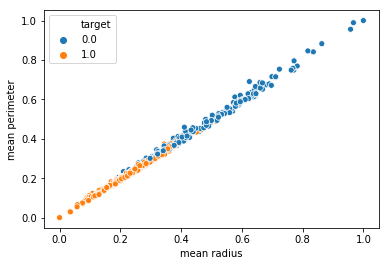

In [0]:
sns.scatterplot(x=x_train_scale['mean radius'],y=x_train_scale['mean perimeter'],hue=y_train)

In [0]:
param_grid = {'C': [0.1,1,5,10,15,18,20,25],'gamma':[0.1,1,0.01,0.2,0.02,0.5,0.3,0.03],'kernel':['rbf']}

In [0]:
from sklearn.model_selection import GridSearchCV


In [0]:
grid = GridSearchCV(model,param_grid,refit=True,verbose=4)

In [0]:
grid.fit(x_tarin_scale,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.889, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.901, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.881, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.954, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.934, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.927, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:    1.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 5, 10, 15, 18, 20, 25],
                         'gamma': [0.1, 1, 0.01, 0.2, 0.02, 0.5, 0.3, 0.03],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [0]:
grid.best_params_

{'C': 20, 'gamma': 0.2, 'kernel': 'rbf'}

In [0]:
pred=grid.predict(x_test_scale)

In [0]:
cm=confusion_matrix(y_test,pred)

In [0]:
cm

array([[43,  0],
       [ 5, 66]])

In [0]:
 print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        43
         1.0       1.00      0.93      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



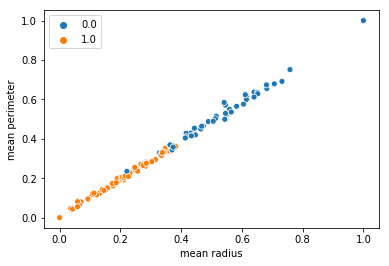

In [0]:
sns.scatterplot(x=x_test_scale['mean radius'],y=x_test_scale['mean perimeter'],hue=pred)

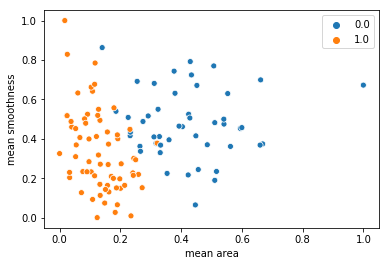

In [0]:
sns.scatterplot(x=x_test_scale['mean area'],y=x_test_scale['mean smoothness'],hue=pred)